In [40]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

In [41]:
data_folder = '__DATA_28'


In [42]:
def compare_classification_performance(original: pd.DataFrame, compare: pd.DataFrame) -> dict:
    o_r2_a24 = original.iloc[16]['Error']
    o_r2_a234 = original.iloc[17]['Error']
    o_r23_a23 = original.iloc[19]['Error']
    o_r234_a23 = original.iloc[23]['Error']
    o_combined_raw = original['Error']
    o_combined = sum(o_combined_raw) / len(o_combined_raw)


    c_r2_a24 = compare.iloc[16]['Error']
    c_r2_a234 = compare.iloc[17]['Error']
    c_r23_a23 = compare.iloc[19]['Error']
    c_r234_a23 = compare.iloc[23]['Error']
    c_combined_raw = compare['Error']
    c_combined = sum(c_combined_raw) / len(c_combined_raw)


    diff_r2_a24 = round(o_r2_a24 - c_r2_a24, 2)
    diff_r2_a234 = round(o_r2_a234 - c_r2_a234, 2)
    diff_r23_a2 = round(o_r23_a23 - c_r23_a23, 2)
    diff_r234_a23 = round(o_r234_a23 - c_r234_a23, 2)
    diff_combined = round(o_combined - c_combined, 2)

    if diff_r2_a24 == 0:
        diff_r2_a24 = f'Equal : {diff_r2_a24:7.2f} %'
    elif diff_r2_a24 > 0:
        diff_r2_a24 = f'Less  : {diff_r2_a24:7.2f} %'
    else:
        diff_r2_a24 = f'More  : {diff_r2_a24:7.2f} %'

    if diff_r2_a234 == 0:
        diff_r2_a234 = f'Equal : {diff_r2_a234:7.2f} %'
    elif diff_r2_a234 > 0:
        diff_r2_a234 = f'Less  : {diff_r2_a234:7.2f} %'
    else:
        diff_r2_a234 = f'More  : {diff_r2_a234:7.2f} %'

    if diff_r23_a2 == 0:
        diff_r23_a2 = f'Equal : {diff_r23_a2:7.2f} %'
    elif diff_r23_a2 > 0:
        diff_r23_a2 = f'Less  : {diff_r23_a2:7.2f} %'
    else:
        diff_r23_a2 = f'More  : {diff_r23_a2:7.2f} %'

    if diff_r234_a23 == 0:
        diff_r234_a23 = f'Equal : {diff_r234_a23:7.2f} %'
    elif diff_r234_a23 > 0:
        diff_r234_a23 = f'Less  : {diff_r234_a23:7.2f} %'
    else:
        diff_r234_a23 = f'More  : {diff_r234_a23:7.2f} %'

    if diff_combined == 0:
        diff_combined = f'Equal : {diff_combined:7.2f} %'
    elif diff_combined > 0:
        diff_combined = f'Less  : {diff_combined:7.2f} %'
    else:
        diff_combined = f'More  : {diff_combined:7.2f} %'


    #print('err r2_a24   : ',  round(c_r2_a24  ,2),'%', diff_r2_a24)
    #print('err r2_a234  : ',  round(c_r2_a234 ,2),'%', diff_r2_a234)
    #print('err r23_a23  : ',  round(c_r23_a23 ,2),'%', diff_r23_a2)
    #print('err comp mean: ',  round(c_combined,2),'%', diff_combined)

    return {
        'err r2_a24': round(c_r2_a24, 2),
        'err r2_a234': round(c_r2_a234, 2),
        'err r23_a23': round(c_r23_a23, 2),
        'err r234_a23': round(c_r234_a23, 2),
        'err comp mean': round(c_combined, 2),
    }

In [43]:
def compare_classification(original: pd.DataFrame, compare: pd.DataFrame)-> tuple[pd.DataFrame, tuple[int, int, int, int]]:
    assert len(original) == len(compare)
    diffs = original.subtract(compare)

    total = len(diffs.columns) * 31
    better_then_original = np.sum((diffs < 0).values.ravel())
    worse_then_original = np.sum((diffs > 0).values.ravel())
    equal_then_original = np.sum((diffs == 0).values.ravel())


    if better_then_original + worse_then_original + equal_then_original == len(diffs.columns) * 31:
        total = len(diffs.columns) * 31
    elif better_then_original + worse_then_original + equal_then_original == len(diffs.columns) * 28:
        total = len(diffs.columns) * 28

    assert total == better_then_original + worse_then_original + equal_then_original

    #print(f'better: {better_then_original:4} ({(better_then_original / total) * 100:5.2f}%)')
    #print(f'worse : {worse_then_original:4} ({(worse_then_original / total) * 100:5.2f}%)')
    #print(f'equal : {equal_then_original:4} ({(equal_then_original / total) * 100:5.2f}%)')
    
    return (diffs, (total, better_then_original, worse_then_original,  equal_then_original))
    

In [44]:
def compare_authentication(original: pd.DataFrame, compare: pd.DataFrame) -> dict:

    o_total_fr = original.iloc[0]['Attempts']
    c_total_fr = compare.iloc[0]['Attempts']

    o_fr = original.iloc[0]['Result']
    c_fr = compare.iloc[0]['Result']

    o_fr_rate = (o_fr / o_total_fr) * 100
    c_fr_rate = (c_fr / c_total_fr) * 100

    diff_fr_rate = round(o_fr_rate - c_fr_rate, 2)

    if diff_fr_rate == 0:
        diff_fr_rate = f'equal: {diff_fr_rate:6.2f}'
    elif diff_fr_rate > 0:
        diff_fr_rate = f'less : {diff_fr_rate:6.2f}'
    else:
        diff_fr_rate = f'more : {diff_fr_rate:6.2f}'

    #print(f'False Reject Rate:  {round(c_fr_rate, 2):6.2f} % {diff_fr_rate} %')

    ###############################################################

    o_total_fa = original.iloc[1]['Attempts']
    c_total_fa = compare.iloc[1]['Attempts']

    o_fa = original.iloc[1]['Result']
    c_fa = compare.iloc[1]['Result']

    o_fa_rate = (o_fa / o_total_fa) * 100
    c_fa_rate = (c_fa / c_total_fa) * 100

    diff_fa_rate = round(o_fa_rate - c_fa_rate, 2)

    if diff_fa_rate == 0:
        diff_fa_rate = f'equal: {diff_fa_rate:6.2f}'
    elif diff_fa_rate > 0:
        diff_fa_rate = f'less : {diff_fa_rate:6.2f}'
    else:
        diff_fa_rate = f'more : {diff_fa_rate::6.2f}'

    #print(f'False Accept Rate:  {round(c_fa_rate,2):6.2f} % {diff_fa_rate} %')

    return {
        'False Reject Rate': round(c_fr_rate, 2), 
        'False Accept Rate': round(c_fa_rate,2)
        }

In [45]:
# load original
original_classification_perf = pd.read_csv(f'./{data_folder}/original_classification_performance.csv')
original_classification = pd.read_csv(f'./{data_folder}/original_classification.csv')
original_authentication = pd.read_csv(f'./{data_folder}/original_authentication.csv')

In [46]:
# original
# classification perf
oiginal_classification_perf_out = compare_classification_performance(original_classification_perf, original_classification_perf)
print(oiginal_classification_perf_out)


# authentication
oiginal_authentication_out = compare_authentication(original_authentication, original_authentication)
print(oiginal_authentication_out)

{'err r2_a24': 5.0, 'err r2_a234': 5.0, 'err r23_a23': 4.52, 'err r234_a23': 5.24, 'err comp mean': 9.81}
{'False Reject Rate': 7.38, 'False Accept Rate': 3.7}


In [47]:
# firefox unisolated resist
firefox_rf_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_unisolated_classification_performance.csv')
firefox_rf_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_unisolated_classification.csv')
firefox_rf_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_unisolated_authentication.csv')


# classification perf
firefox_rf_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_unisolated_classification_perf)
print(firefox_rf_unisolated_classification_perf_out)

# classification
firefox_rf_unisolated_classification_out = compare_classification(original_classification, firefox_rf_unisolated_classification)

# authentication
firefox_rf_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_unisolated_authentication)
print(firefox_rf_unisolated_authentication_out)

{'err r2_a24': 5.24, 'err r2_a234': 5.24, 'err r23_a23': 5.95, 'err r234_a23': 5.24, 'err comp mean': 16.18}
{'False Reject Rate': 6.43, 'False Accept Rate': 3.7}


In [48]:
# firefox unisolated resist 20ms
firefox_rf_20ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_20ms_unisolated_classification_performance.csv')
firefox_rf_20ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_20ms_unisolated_classification.csv')
firefox_rf_20ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_20ms_unisolated_authentication.csv')


# classification perf
firefox_rf_20ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_20ms_unisolated_classification_perf)


# classification
firefox_rf_20ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_20ms_unisolated_classification)

# authentication
firefox_rf_20ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_20ms_unisolated_authentication)


In [49]:
# firefox unisolated resist 33ms
firefox_rf_33ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_33ms_unisolated_classification_performance.csv')
firefox_rf_33ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_33ms_unisolated_classification.csv')
firefox_rf_33ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_33ms_unisolated_authentication.csv')


# classification perf
firefox_rf_33ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_33ms_unisolated_classification_perf)

# classification
firefox_rf_33ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_33ms_unisolated_classification)

# authentication
firefox_rf_33ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_33ms_unisolated_authentication)


In [50]:
# firefox unisolated resist 40ms
firefox_rf_40ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_40ms_unisolated_classification_performance.csv')
firefox_rf_40ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_40ms_unisolated_classification.csv')
firefox_rf_40ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_40ms_unisolated_authentication.csv')


# classification perf
firefox_rf_40ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_40ms_unisolated_classification_perf)

# classification
firefox_rf_40ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_40ms_unisolated_classification)

# authentication
firefox_rf_40ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_40ms_unisolated_authentication)

In [51]:
# firefox unisolated resist 60ms
firefox_rf_60ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_60ms_unisolated_classification_performance.csv')
firefox_rf_60ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_60ms_unisolated_classification.csv')
firefox_rf_60ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_60ms_unisolated_authentication.csv')


# classification perf
firefox_rf_60ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_60ms_unisolated_classification_perf)

# classification
firefox_rf_60ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_60ms_unisolated_classification)

# authentication
firefox_rf_60ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_60ms_unisolated_authentication)

In [52]:
# firefox unisolated resist 80ms
firefox_rf_80ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_80ms_unisolated_classification_performance.csv')
firefox_rf_80ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_80ms_unisolated_classification.csv')
firefox_rf_80ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_80ms_unisolated_authentication.csv')


# classification perf
firefox_rf_80ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_80ms_unisolated_classification_perf)

# classification
firefox_rf_80ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_80ms_unisolated_classification)

# authentication
firefox_rf_80ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_80ms_unisolated_authentication)

In [53]:
# firefox unisolated resist 100ms
firefox_rf_100ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_100ms_unisolated_classification_performance.csv')
firefox_rf_100ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_100ms_unisolated_classification.csv')
firefox_rf_100ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_100ms_unisolated_authentication.csv')


# classification perf
firefox_rf_100ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_100ms_unisolated_classification_perf)

# classification
firefox_rf_100ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_100ms_unisolated_classification)

# authentication
firefox_rf_100ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_100ms_unisolated_authentication)

In [54]:
# firefox unisolated resist 120ms
firefox_rf_120ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_120ms_unisolated_classification_performance.csv')
firefox_rf_120ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_120ms_unisolated_classification.csv')
firefox_rf_120ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_120ms_unisolated_authentication.csv')


# classification perf
firefox_rf_120ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_120ms_unisolated_classification_perf)

# classification
firefox_rf_120ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_120ms_unisolated_classification)

# authentication
firefox_rf_120ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_120ms_unisolated_authentication)

In [55]:
# firefox unisolated resist 140ms
firefox_rf_140ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_140ms_unisolated_classification_performance.csv')
firefox_rf_140ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_140ms_unisolated_classification.csv')
firefox_rf_140ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_140ms_unisolated_authentication.csv')


# classification perf
firefox_rf_140ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_140ms_unisolated_classification_perf)

# classification
firefox_rf_140ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_140ms_unisolated_classification)

# authentication
firefox_rf_140ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_140ms_unisolated_authentication)

In [56]:
# firefox unisolated resist 160ms
firefox_rf_160ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_160ms_unisolated_classification_performance.csv')
firefox_rf_160ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_160ms_unisolated_classification.csv')
firefox_rf_160ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_160ms_unisolated_authentication.csv')


# classification perf
firefox_rf_160ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_160ms_unisolated_classification_perf)

# classification
firefox_rf_160ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_160ms_unisolated_classification)

# authentication
firefox_rf_160ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_160ms_unisolated_authentication)

In [57]:
# firefox unisolated resist 180ms
firefox_rf_180ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_180ms_unisolated_classification_performance.csv')
firefox_rf_180ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_180ms_unisolated_classification.csv')
firefox_rf_180ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_180ms_unisolated_authentication.csv')


# classification perf
firefox_rf_180ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_180ms_unisolated_classification_perf)

# classification
firefox_rf_180ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_180ms_unisolated_classification)

# authentication
firefox_rf_180ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_180ms_unisolated_authentication)

In [58]:
# firefox unisolated resist 200ms
firefox_rf_200ms_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_200ms_unisolated_classification_performance.csv')
firefox_rf_200ms_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_200ms_unisolated_classification.csv')
firefox_rf_200ms_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_200ms_unisolated_authentication.csv')


# classification perf
firefox_rf_200ms_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_200ms_unisolated_classification_perf)

# classification
firefox_rf_200ms_unisolated_classification_out = compare_classification(original_classification, firefox_rf_200ms_unisolated_classification)

# authentication
firefox_rf_200ms_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_200ms_unisolated_authentication)

In [59]:
# firefox unisolated resist NJ
firefox_rf_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_NJ_unisolated_classification_performance.csv')
firefox_rf_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_NJ_unisolated_classification.csv')
firefox_rf_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_unisolated_classification_perf)
print(firefox_rf_NJ_unisolated_classification_perf_out)

# classification
firefox_rf_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_NJ_unisolated_classification)

# authentication
firefox_rf_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_NJ_unisolated_authentication)
print(firefox_rf_NJ_unisolated_authentication_out)

{'err r2_a24': 5.24, 'err r2_a234': 5.24, 'err r23_a23': 5.95, 'err r234_a23': 5.24, 'err comp mean': 16.18}
{'False Reject Rate': 6.43, 'False Accept Rate': 3.7}


In [60]:
# firefox unisolated resist 20ms NJ
firefox_rf_20ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_20ms_NJ_unisolated_classification_performance.csv')
firefox_rf_20ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_20ms_NJ_unisolated_classification.csv')
firefox_rf_20ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_20ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_20ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_20ms_NJ_unisolated_classification_perf)


# classification
firefox_rf_20ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_20ms_NJ_unisolated_classification)

# authentication
firefox_rf_20ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_20ms_NJ_unisolated_authentication)

In [61]:
# firefox unisolated resist 33ms NJ
firefox_rf_33ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_33ms_NJ_unisolated_classification_performance.csv')
firefox_rf_33ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_33ms_NJ_unisolated_classification.csv')
firefox_rf_33ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_33ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_33ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_33ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_33ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_33ms_NJ_unisolated_classification)

# authentication
firefox_rf_33ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_33ms_NJ_unisolated_authentication)


In [62]:
# firefox unisolated resist 40ms NJ
firefox_rf_40ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_40ms_NJ_unisolated_classification_performance.csv')
firefox_rf_40ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_40ms_NJ_unisolated_classification.csv')
firefox_rf_40ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_40ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_40ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_40ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_40ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_40ms_NJ_unisolated_classification)

# authentication
firefox_rf_40ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_40ms_NJ_unisolated_authentication)

In [63]:
# firefox unisolated resist 60ms NJ
firefox_rf_60ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_60ms_NJ_unisolated_classification_performance.csv')
firefox_rf_60ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_60ms_NJ_unisolated_classification.csv')
firefox_rf_60ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_60ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_60ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_60ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_60ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_60ms_NJ_unisolated_classification)

# authentication
firefox_rf_60ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_60ms_NJ_unisolated_authentication)

In [64]:
# firefox unisolated resist 80ms NJ
firefox_rf_80ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_80ms_NJ_unisolated_classification_performance.csv')
firefox_rf_80ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_80ms_NJ_unisolated_classification.csv')
firefox_rf_80ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_80ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_80ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_80ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_80ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_80ms_NJ_unisolated_classification)

# authentication
firefox_rf_80ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_80ms_NJ_unisolated_authentication)

In [65]:
# firefox unisolated resist 100ms NJ
firefox_rf_100ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_100ms_NJ_unisolated_classification_performance.csv')
firefox_rf_100ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_100ms_NJ_unisolated_classification.csv')
firefox_rf_100ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_100ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_100ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_100ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_100ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_100ms_NJ_unisolated_classification)

# authentication
firefox_rf_100ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_100ms_NJ_unisolated_authentication)

In [66]:
# firefox unisolated resist 120ms NJ
firefox_rf_120ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_120ms_NJ_unisolated_classification_performance.csv')
firefox_rf_120ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_120ms_NJ_unisolated_classification.csv')
firefox_rf_120ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_120ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_120ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_120ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_120ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_120ms_NJ_unisolated_classification)

# authentication
firefox_rf_120ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_120ms_NJ_unisolated_authentication)

In [67]:
# firefox unisolated resist 140ms NJ
firefox_rf_140ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_140ms_NJ_unisolated_classification_performance.csv')
firefox_rf_140ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_140ms_NJ_unisolated_classification.csv')
firefox_rf_140ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_140ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_140ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_140ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_140ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_140ms_NJ_unisolated_classification)

# authentication
firefox_rf_140ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_140ms_NJ_unisolated_authentication)

In [68]:
# firefox unisolated resist 160ms NJ
firefox_rf_160ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_160ms_NJ_unisolated_classification_performance.csv')
firefox_rf_160ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_160ms_NJ_unisolated_classification.csv')
firefox_rf_160ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_160ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_160ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_160ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_160ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_160ms_NJ_unisolated_classification)

# authentication
firefox_rf_160ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_160ms_NJ_unisolated_authentication)

In [69]:
# firefox unisolated resist 180ms NJ
firefox_rf_180ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_180ms_NJ_unisolated_classification_performance.csv')
firefox_rf_180ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_180ms_NJ_unisolated_classification.csv')
firefox_rf_180ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_180ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_180ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_180ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_180ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_180ms_NJ_unisolated_classification)

# authentication
firefox_rf_180ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_180ms_NJ_unisolated_authentication)

In [70]:
# firefox unisolated resist 200ms NJ
firefox_rf_200ms_NJ_unisolated_classification_perf = pd.read_csv(f'./{data_folder}/firefox_resistFP_200ms_NJ_unisolated_classification_performance.csv')
firefox_rf_200ms_NJ_unisolated_classification = pd.read_csv(f'./{data_folder}/firefox_resistFP_200ms_NJ_unisolated_classification.csv')
firefox_rf_200ms_NJ_unisolated_authentication = pd.read_csv(f'./{data_folder}/firefox_resistFP_200ms_NJ_unisolated_authentication.csv')


# classification perf
firefox_rf_200ms_NJ_unisolated_classification_perf_out = compare_classification_performance(original_classification_perf, firefox_rf_200ms_NJ_unisolated_classification_perf)

# classification
firefox_rf_200ms_NJ_unisolated_classification_out = compare_classification(original_classification, firefox_rf_200ms_NJ_unisolated_classification)

# authentication
firefox_rf_200ms_NJ_unisolated_authentication_out = compare_authentication(original_authentication, firefox_rf_200ms_NJ_unisolated_authentication)

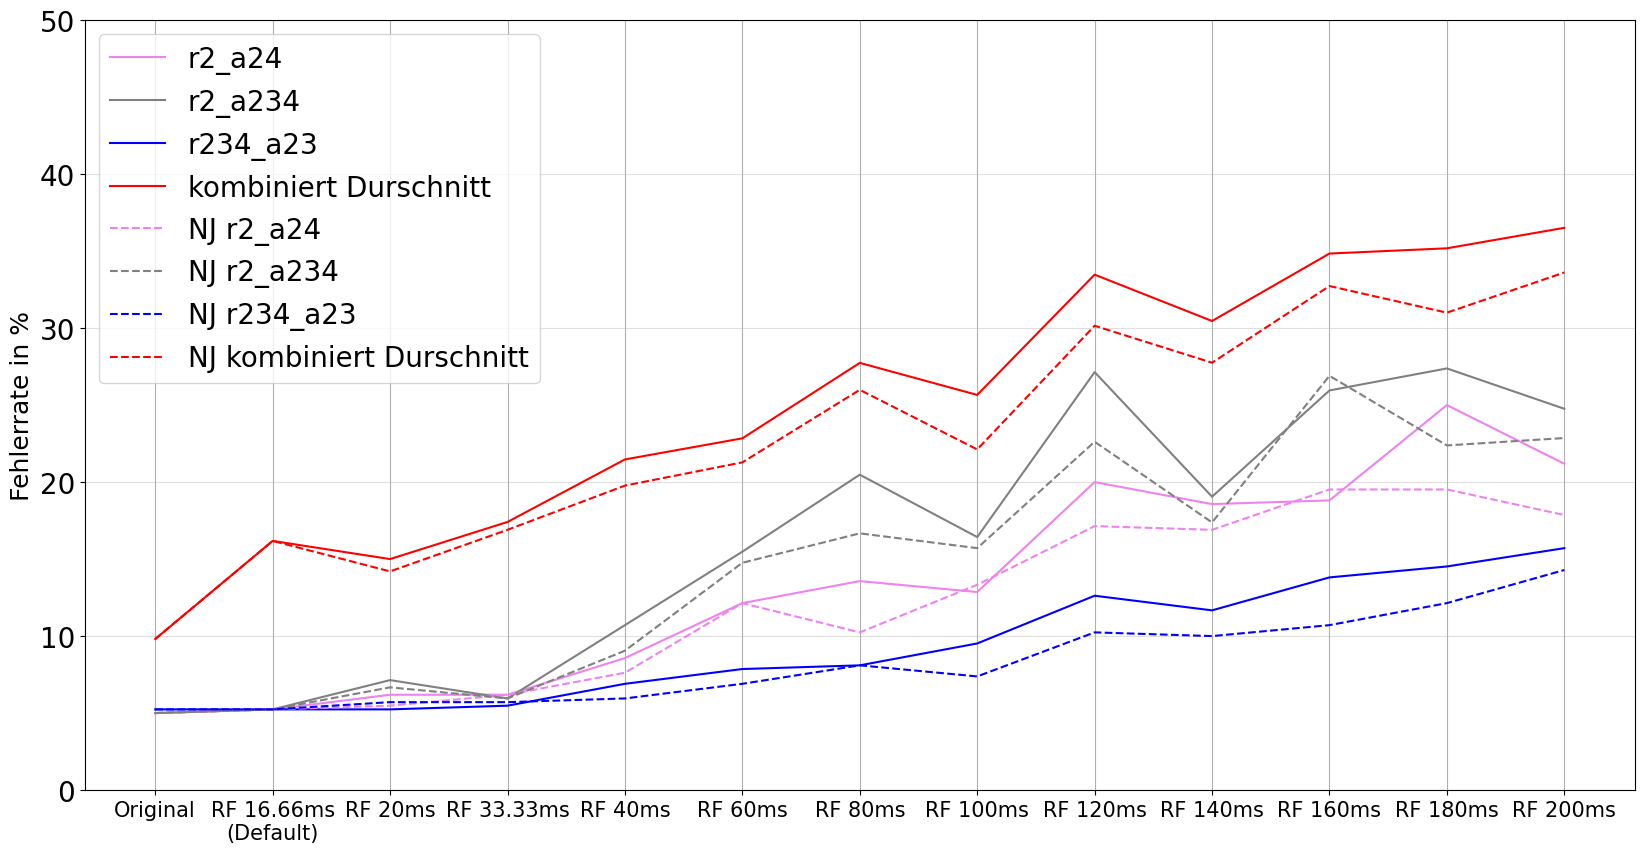

In [71]:
# plot classification
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
labels = ['Original', 'RF 16.66ms\n(Default)', 'RF 20ms', 'RF 33.33ms', 'RF 40ms', 'RF 60ms', 'RF 80ms', 'RF 100ms', 
          'RF 120ms', 'RF 140ms', 'RF 160ms', 'RF 180ms', 'RF 200ms', ]

y_ticks = np.arange(0,60,10)

# r234_a23

y_classification_r2_a24 = [
    oiginal_classification_perf_out['err r2_a24'],
    firefox_rf_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_20ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_33ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_40ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_60ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_80ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_100ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_120ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_140ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_160ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_180ms_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_200ms_unisolated_classification_perf_out['err r2_a24'],
]
y_classification_r2_a234 = [
    oiginal_classification_perf_out['err r2_a234'],
    firefox_rf_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_20ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_33ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_40ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_60ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_80ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_100ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_120ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_140ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_160ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_180ms_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_200ms_unisolated_classification_perf_out['err r2_a234'],
]

y_classification_r23_a23 = [
    oiginal_classification_perf_out['err r23_a23'],
    firefox_rf_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_20ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_33ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_40ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_60ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_80ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_100ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_120ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_140ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_160ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_180ms_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_200ms_unisolated_classification_perf_out['err r23_a23'],
]

y_classification_r234_a23 = [
    oiginal_classification_perf_out['err r234_a23'],
    firefox_rf_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_20ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_33ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_40ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_60ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_80ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_100ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_120ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_140ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_160ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_180ms_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_200ms_unisolated_classification_perf_out['err r234_a23'],
]

y_classification_comp_mean = [
    oiginal_classification_perf_out['err comp mean'],
    firefox_rf_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_20ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_33ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_40ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_60ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_80ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_100ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_120ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_140ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_160ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_180ms_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_200ms_unisolated_classification_perf_out['err comp mean'],
]


####### NJ #######
y_NJ_classification_r2_a24 = [
    oiginal_classification_perf_out['err r2_a24'],
    firefox_rf_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_20ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_33ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_40ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_60ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_80ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_100ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_120ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_140ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_160ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_180ms_NJ_unisolated_classification_perf_out['err r2_a24'],
    firefox_rf_200ms_NJ_unisolated_classification_perf_out['err r2_a24'],
]
y_NJ_classification_r2_a234 = [
    oiginal_classification_perf_out['err r2_a234'],
    firefox_rf_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_20ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_33ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_40ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_60ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_80ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_100ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_120ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_140ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_160ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_180ms_NJ_unisolated_classification_perf_out['err r2_a234'],
    firefox_rf_200ms_NJ_unisolated_classification_perf_out['err r2_a234'],
]

y_NJ_classification_r23_a23 = [
    oiginal_classification_perf_out['err r23_a23'],
    firefox_rf_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_20ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_33ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_40ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_60ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_80ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_100ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_120ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_140ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_160ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_180ms_NJ_unisolated_classification_perf_out['err r23_a23'],
    firefox_rf_200ms_NJ_unisolated_classification_perf_out['err r23_a23'],
]

y_NJ_classification_r234_a23 = [
    oiginal_classification_perf_out['err r234_a23'],
    firefox_rf_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_20ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_33ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_40ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_60ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_80ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_100ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_120ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_140ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_160ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_180ms_NJ_unisolated_classification_perf_out['err r234_a23'],
    firefox_rf_200ms_NJ_unisolated_classification_perf_out['err r234_a23'],
]

y_NJ_classification_comp_mean = [
    oiginal_classification_perf_out['err comp mean'],
    firefox_rf_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_20ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_33ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_40ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_60ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_80ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_100ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_120ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_140ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_160ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_180ms_NJ_unisolated_classification_perf_out['err comp mean'],
    firefox_rf_200ms_NJ_unisolated_classification_perf_out['err comp mean'],
]

plt.plot(x, y_classification_r2_a24,  label="r2_a24", color="violet")
plt.plot(x, y_classification_r2_a234,  label="r2_a234", color="gray")
#plt.plot(x, y_classification_r23_a23,  label="r23_a23", color="green")
plt.plot(x, y_classification_r234_a23,  label="r234_a23", color="blue")
plt.plot(x, y_classification_comp_mean,  label="kombiniert Durschnitt", color="red")

plt.plot(x, y_NJ_classification_r2_a24,  label="NJ r2_a24", color="violet", linestyle='dashed')
plt.plot(x, y_NJ_classification_r2_a234,  label="NJ r2_a234", color="gray", linestyle='dashed')
#plt.plot(x, y_NJ_classification_r23_a23,  label="NJ r23_a23", color="green", linestyle='dashed')
plt.plot(x, y_NJ_classification_r234_a23,  label="NJ r234_a23", color="blue", linestyle='dashed')
plt.plot(x, y_NJ_classification_comp_mean,  label="NJ kombiniert Durschnitt", color="red", linestyle='dashed')



plt.title("", fontsize=18)
plt.ylabel("Fehlerrate in %", fontsize=18)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(y_ticks, fontsize=20)
plt.legend(fontsize=20)
plt.grid(axis='y', alpha= 0.4)
plt.grid(axis='x', alpha=1.)
plt.savefig("./class.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()

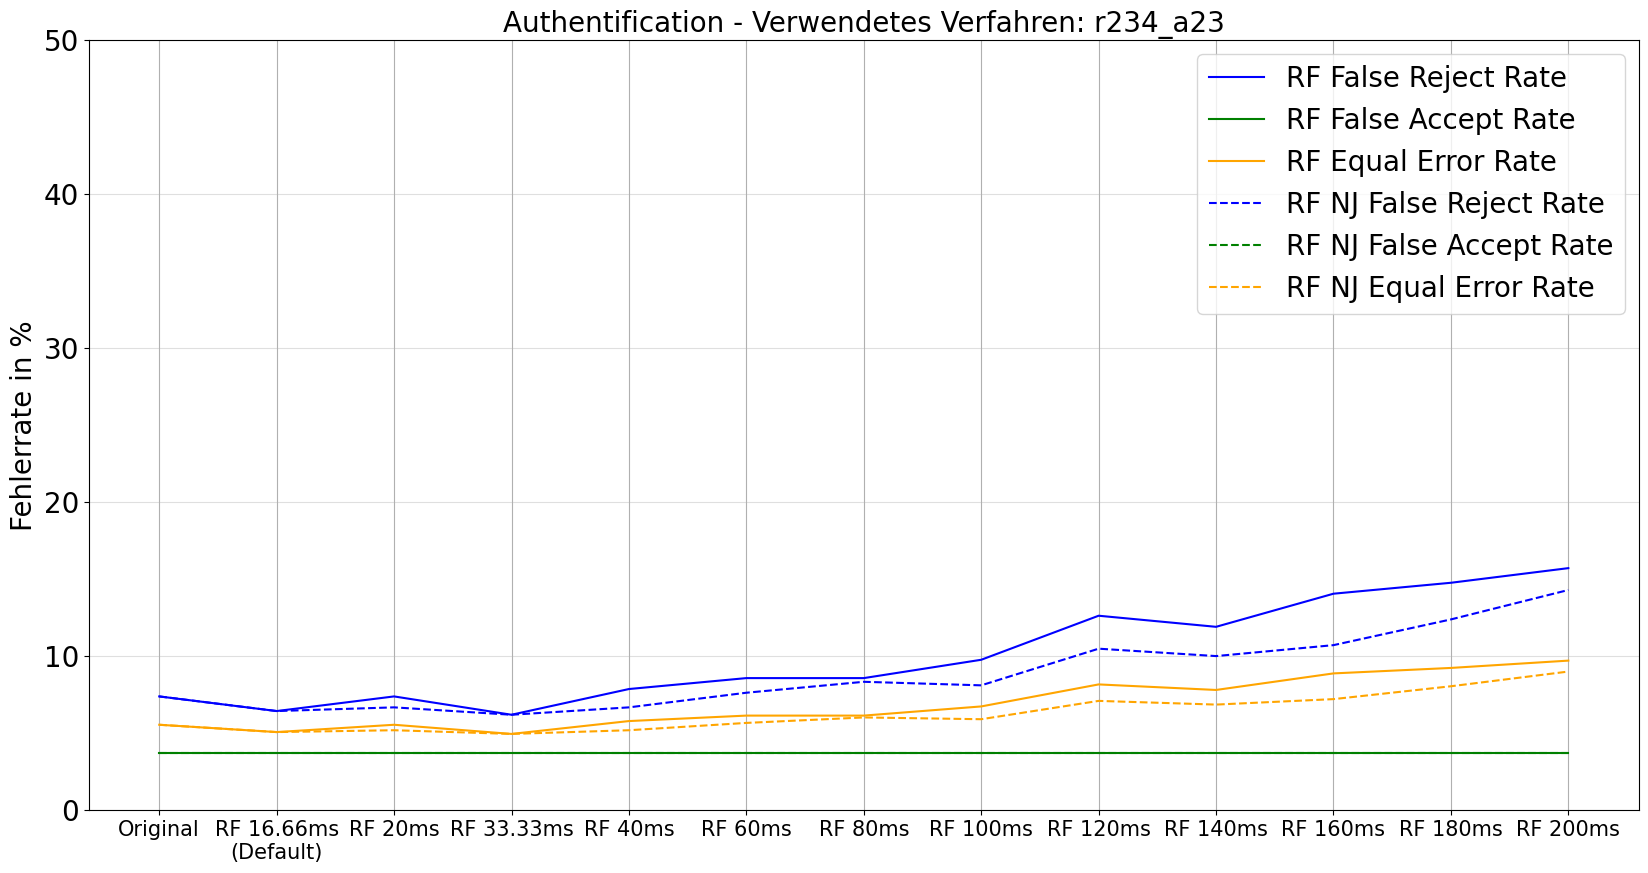

In [72]:
# plot authentication
x = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13]
labels = ['Original', 'RF 16.66ms\n(Default)', 'RF 20ms', 'RF 33.33ms', 'RF 40ms', 'RF 60ms', 'RF 80ms', 'RF 100ms', 
         'RF 120ms', 'RF 140ms', 'RF 160ms', 'RF 180ms', 'RF 200ms', ]
y_ticks = np.arange(0, 60, 10)

y_authentication_fr = [
    oiginal_authentication_out['False Reject Rate'],
    firefox_rf_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_20ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_33ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_40ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_60ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_80ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_100ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_120ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_140ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_160ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_180ms_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_200ms_unisolated_authentication_out['False Reject Rate'],
]

y_authentication_fa = [
    oiginal_authentication_out['False Accept Rate'],
    firefox_rf_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_20ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_33ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_40ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_60ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_80ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_100ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_120ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_140ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_160ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_180ms_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_200ms_unisolated_authentication_out['False Accept Rate'],
]

y_authentication_eer = [
    (oiginal_authentication_out['False Reject Rate'] + oiginal_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_unisolated_authentication_out['False Reject Rate'] + firefox_rf_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_20ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_20ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_33ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_33ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_40ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_40ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_60ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_60ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_80ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_80ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_100ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_100ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_120ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_120ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_140ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_140ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_160ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_160ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_180ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_180ms_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_200ms_unisolated_authentication_out['False Reject Rate'] + firefox_rf_200ms_unisolated_authentication_out['False Accept Rate']) / 2,
]


####### NJ ########
y_NJ_authentication_fr = [
    oiginal_authentication_out['False Reject Rate'],
    firefox_rf_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_20ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_33ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_40ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_60ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_80ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_100ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_120ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_140ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_160ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_180ms_NJ_unisolated_authentication_out['False Reject Rate'],
    firefox_rf_200ms_NJ_unisolated_authentication_out['False Reject Rate'],
]

y_NJ_authentication_fa = [
    oiginal_authentication_out['False Accept Rate'],
    firefox_rf_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_20ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_33ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_40ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_60ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_80ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_100ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_120ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_140ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_160ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_180ms_NJ_unisolated_authentication_out['False Accept Rate'],
    firefox_rf_200ms_NJ_unisolated_authentication_out['False Accept Rate'],
]

y_NJ_authentication_eer = [
    (oiginal_authentication_out['False Reject Rate'] + oiginal_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_20ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_20ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_33ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_33ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_40ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_40ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_60ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_60ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_80ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_80ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_100ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_100ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_120ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_120ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_140ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_140ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_160ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_160ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_180ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_180ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
    (firefox_rf_200ms_NJ_unisolated_authentication_out['False Reject Rate'] + firefox_rf_200ms_NJ_unisolated_authentication_out['False Accept Rate']) / 2,
]


plt.plot(x, y_authentication_fr,  label="RF False Reject Rate", color="blue")
plt.plot(x, y_authentication_fa,  label="RF False Accept Rate", color="green")
plt.plot(x, y_authentication_eer,  label="RF Equal Error Rate", color="orange")

plt.plot(x, y_NJ_authentication_fr,  label="RF NJ False Reject Rate", color="blue", linestyle='dashed')
plt.plot(x, y_NJ_authentication_fa,  label="RF NJ False Accept Rate", color="green", linestyle='dashed')
plt.plot(x, y_NJ_authentication_eer,  label="RF NJ Equal Error Rate", color="orange", linestyle='dashed')

plt.title("Authentification - Verwendetes Verfahren: r234_a23", fontsize=20)
plt.ylabel("Fehlerrate in %", fontsize=20)
plt.xticks(x, labels, rotation=0, fontsize=15)
plt.yticks(y_ticks, fontsize=20)
plt.legend(fontsize=20)
plt.grid(axis='x')
plt.grid(axis='y', alpha= 0.4)
plt.savefig("./auth.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()